In [1]:
import pandas as pd
import re
import spacy
nlp = spacy.load('es_core_news_sm')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

%matplotlib inline

In [2]:
#Abro con encoding='utf-8' para que me tome bien los acentos
with open('01.txt', encoding='utf-8') as f:
    documento = f.read()

In [3]:
documento

'RODRIGUEZ\nINMOBILIARIA\nCONTRATO DE LOCACION\nEn la ciudad de Santa Rosa de Calamuchita, en el día 1 de julio de 2021, entre\nla Sr. Rubén Abel Gutiérrez, divorciado, argentino, mayor de edad, D.N.I N°\n8.577.793, con domicilio en Calle Los Fresnos 14, B° Loma Hermosa, Santa\nRosa de Calamuchita, Córdoba, en adelante denominado LOCADOR y la Sra.\nMariana Soledad Lescano, soltera, argentina, mayor de edad, D.N.I N°\n35.632.019, con domicilio en Calle Cristóbal Colon 545 5° A, Morón, Buenos\nAires, y a partir de este contrato en Calle José Peláez S/N, B° Santa Mónica,\nSanta Rosa de Calamuchita, en adelante denominada LOCATARIA, resuelven\ncelebrar el presente contrato de locación, sujeto a las siguientes cláusulas:\nPRIMERA: Objeto: EL LOCADOR entrega en locación a LA LOCATARIA y ésta\nrecibe en ese carácter un inmueble que se describe a continuación: casa\nhabitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de\nCalamuchita.\nSEGUNDA: Comodidades: El inmueble est

In [4]:
#Borro los caracteres \n y reemplazo por un espacio
#Borro los caracteres $. y reemplazo por un $
#Borro los caracteres .- y reemplazo por nada
documento = documento.replace('\n', ' ')
documento = documento.replace('$.', '$')
documento = documento.replace('.-', '')
#documento = documento.split('\n')
#doc = doc.lower()
documento

'RODRIGUEZ INMOBILIARIA CONTRATO DE LOCACION En la ciudad de Santa Rosa de Calamuchita, en el día 1 de julio de 2021, entre la Sr. Rubén Abel Gutiérrez, divorciado, argentino, mayor de edad, D.N.I N° 8.577.793, con domicilio en Calle Los Fresnos 14, B° Loma Hermosa, Santa Rosa de Calamuchita, Córdoba, en adelante denominado LOCADOR y la Sra. Mariana Soledad Lescano, soltera, argentina, mayor de edad, D.N.I N° 35.632.019, con domicilio en Calle Cristóbal Colon 545 5° A, Morón, Buenos Aires, y a partir de este contrato en Calle José Peláez S/N, B° Santa Mónica, Santa Rosa de Calamuchita, en adelante denominada LOCATARIA, resuelven celebrar el presente contrato de locación, sujeto a las siguientes cláusulas: PRIMERA: Objeto: EL LOCADOR entrega en locación a LA LOCATARIA y ésta recibe en ese carácter un inmueble que se describe a continuación: casa habitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de Calamuchita. SEGUNDA: Comodidades: El inmueble está compuesto por:

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

https://www.kaggle.com/code/dhruvildave/regular-expression-primer?scriptVersionId=95918885&cellId=37

In [5]:
doc = nlp(documento)

In [6]:
print(f'El contrato tiene {len(doc)} palabras en total, y {len(doc.vocab)} palabras únicas')

El contrato tiene 2756 palabras en total, y 1287 palabras únicas


### Busca DNI

In [7]:
#dni_8digitos = re.search(r'\d{2}.\d{3}.\d{3}', documento)
#dni_7digitos = re.search(r'\d.\d{3}.\d{3}', documento)

In [8]:
#print(f'DNI_1 {dni_8digitos.group()} está en la posición {dni_8digitos.span()}, empieza en {dni_8digitos.start()} y termina en {dni_8digitos.end()}')
#print(f'DNI_2 {dni_7digitos.group()} está en la posición {dni_7digitos.span()}, empieza en {dni_7digitos.start()} y termina en {dni_7digitos.end()}')

In [9]:
dni = re.findall(r'\d{1,3}.\d{3}.\d{3}', documento)
dni

['8.577.793', '35.632.019', '26.169.440']

In [10]:
for element in enumerate(dni):
    print (element[1])

8.577.793
35.632.019
26.169.440


In [11]:
count = 0
for DNI in re.finditer(r'\d{1,3}.\d{3}.\d{3}', documento):
    count += 1
    #print("dni", count, dni.group(), "start index", dni.start(), "end index", dni.end())
    print(f'El DNI {count}, N° {DNI.group()}, está en la posición {DNI.span()}')

El DNI 1, N° 8.577.793, está en la posición (199, 208)
El DNI 2, N° 35.632.019, está en la posición (412, 422)
El DNI 3, N° 26.169.440, está en la posición (13057, 13067)


In [12]:
from collections import defaultdict, namedtuple

# build a named tuple for the word locations
Location = namedtuple('Location', 'line col')

# dict keyd by word in document
word_locations = defaultdict(list)

# go through each line in the document
for line_num, line in enumerate(open('01.txt', 'r').readlines()):
    column = -1
    prev_col = 0
    # process the line, one word at a time
    while True:   
        if prev_col < column:
            word = line[prev_col:column]
            word_locations[word].append(Location(line_num, prev_col))
        prev_col = column+1
        # find the next space
        column = line.find(' ', prev_col)
        # check for more spaces on the line
        if column == -1:
            # there are no more spaces on the line, store the last word
            word = line[prev_col:column]
            word_locations[word].append(Location(line_num, prev_col))
            # go onto the next line
            break

word_locations

defaultdict(list,
            {'RODRIGUEZ': [Location(line=0, col=0),
              Location(line=29, col=0),
              Location(line=31, col=0),
              Location(line=59, col=0),
              Location(line=61, col=0),
              Location(line=90, col=0),
              Location(line=92, col=0),
              Location(line=122, col=0),
              Location(line=124, col=0),
              Location(line=151, col=0),
              Location(line=153, col=0),
              Location(line=180, col=0),
              Location(line=182, col=0),
              Location(line=210, col=0),
              Location(line=212, col=0),
              Location(line=238, col=0),
              Location(line=240, col=0),
              Location(line=245, col=0),
              Location(line=248, col=0)],
             'INMOBILIARIA': [Location(line=1, col=0),
              Location(line=29, col=10),
              Location(line=32, col=0),
              Location(line=59, col=10),
              Locati

In [13]:
word_locations['8.577.793,']

[Location(line=5, col=0)]

In [14]:
word_locations['35.632.019,']

[Location(line=8, col=0)]

In [15]:
word_locations['26.169.440,']

[Location(line=206, col=0)]

In [16]:
#print(f'DNI_1 {dni.group()} está en la posición {dni.span()}, empieza en {dni.start()} y termina en {dni.end()}')

### Busca dirección del inmueble

In [17]:
calle = word_locations['Calle,']
primera = word_locations['PRIMERA:']
print(f'Primera {primera} - Calle: {calle}')

Primera [Location(line=12, col=0), Location(line=234, col=10)] - Calle: [Location(line=14, col=23)]


In [18]:
# string to search in file
word = 'situada en Calle'
word2 = 'situado en Calle'
with open('01.txt', encoding='utf-8') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'está en el texto')
            print('Número de línea:', lines.index(line))
            direccion = [line, lines[lines.index(line)+1]]
            print('Texto:', line, lines[lines.index(line)+1])
        elif line.find(word2) != -1:
            print(word2, 'está en el texto')
            print('Número de línea:', lines.index(line))
            print('Texto:',line, lines[lines.index(line)+1] )
            #print('Línea siguiente:', lines[lines.index(line)+1])

situada en Calle está en el texto
Número de línea: 14
Texto: habitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de
 Calamuchita.



In [19]:
direccion

['habitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de\n',
 'Calamuchita.\n']

In [20]:
import locationtagger

# extracting entities.
place_entity = locationtagger.find_locations(text = documento)

# getting all countries
print("Paises en el texto: ")
print(place_entity.countries)

# getting all states
print("Provincias en el texto: ")
print(place_entity.regions)
 
# getting all cities
print("Ciudades en el texto: ")
print(place_entity.cities)

Paises en el texto: 
['argentina', 'Argentina']
Provincias en el texto: 
[]
Ciudades en el texto: 
['Santa Rosa', 'Buenos Aires', 'Rodriguez', 'Diez', 'Al', 'Quinta', 'Carlos Pellegrini', 'Calle', 'Argentina']


### Busca montos

In [21]:
montos = re.findall(r'\$[0-9]{1,3}.[0-9]{3}',documento) #^[0-9]{5}$
print(montos)

['$16.000', '$30.000']


In [22]:
count = 0
for montos in re.finditer(r'\$[0-9]{2}.[0-9]{3}', documento):
    count += 1
    #print("dni", count, dni.group(), "start index", dni.start(), "end index", dni.end())
    print(f'El monto {count}, de {montos.group()}, está en la posición {montos.span()}')

El monto 1, de $16.000, está en la posición (3749, 3756)
El monto 2, de $30.000, está en la posición (14295, 14302)


In [23]:
word_locations['($16.000.-).']

[Location(line=58, col=0)]

In [24]:
word_locations['($.30.000.-)']

[Location(line=226, col=19)]

In [25]:
# string to search in file
word = 'Precio:'
word2 = '$16.000'
with open('01.txt', encoding='utf-8') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'está en el texto')
            print('Número de línea:', lines.index(line))
            monto = [line, lines[lines.index(line)+1]]
            print('Texto:', line, lines[lines.index(line)+1], lines[lines.index(line)+2])
        elif line.find(word2) != -1:
            print(word2, 'está en el texto')
            print('Número de línea:', lines.index(line))
            print('Texto:',line, lines[lines.index(line)+1] )
            #print('Línea siguiente:', lines[lines.index(line)+1])

Precio: está en el texto
Número de línea: 56
Texto: QUINTA: Precio: Se conviene de común acuerdo que el precio locativo inicial
 correspondiente al primer año del presente contrato es de PESOS: dieciséis mil
 ($16.000.-). Con respecto al aumento del precio locativo será de acuerdo a lo

$16.000 está en el texto
Número de línea: 58
Texto: ($16.000.-). Con respecto al aumento del precio locativo será de acuerdo a lo
 RODRIGUEZ INMOBILIARIA



In [26]:
# string to search in file
word = 'comisión inmobiliaria'
word2 = '$.30.000'
with open('01.txt', encoding='utf-8') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'está en el texto')
            print('Número de línea:', lines.index(line))
            monto2 = [line, lines[lines.index(line)+1]]
            print('Texto:', line, lines[lines.index(line)+1])
        elif line.find(word2) != -1:
            print(word2, 'está en el texto')
            print('Número de línea:', lines.index(line))
            print('Texto:',line, lines[lines.index(line)+1] )
            #print('Línea siguiente:', lines[lines.index(line)+1])

comisión inmobiliaria está en el texto
Número de línea: 225
Texto: cierta al acto. La comisión inmobiliaria por la gestión del presente contrato es de
 PESOS: treinta mil ($.30.000.-) monto que corresponde abonar a la

$.30.000 está en el texto
Número de línea: 226
Texto: PESOS: treinta mil ($.30.000.-) monto que corresponde abonar a la
 LOCATARIA.-



### Busca nombres

In [27]:
documento = documento.replace('á', 'a')
documento = documento.replace('é', 'e')
documento = documento.replace('í', 'i')
documento = documento.replace('ó', 'o')
documento = documento.replace('ú', 'u')

In [28]:
regex = '((?:Sr\.|Sra\.)( [A-Z]{1}[a-z]+)+)' # this will return three groups of matches
nombres = [match[0] for match in re.findall(regex, documento)] #simply extracting the first group of matches, which is the name
nombres

['Sr. Ruben Abel Gutierrez',
 'Sra. Mariana Soledad Lescano',
 'Sr. Lucio Nicolas Rodriguez',
 'Sr. Alejandro Ezequiel Cilia']

In [29]:
nombres

['Sr. Ruben Abel Gutierrez',
 'Sra. Mariana Soledad Lescano',
 'Sr. Lucio Nicolas Rodriguez',
 'Sr. Alejandro Ezequiel Cilia']

In [30]:
count = 0
for nombre in re.finditer(r'((?:Sr\.|Sra\.)( [A-Z]{1}[a-z]+)+)', documento):
    #print("dni", count, dni.group(), "start index", dni.start(), "end index", dni.end())
    print(f'{nombre.group()}, está en la posición {nombre.span()}')

Sr. Ruben Abel Gutierrez, está en la posición (126, 150)
Sra. Mariana Soledad Lescano, está en la posición (338, 366)
Sr. Lucio Nicolas Rodriguez, está en la posición (4816, 4843)
Sr. Alejandro Ezequiel Cilia, está en la posición (13010, 13038)


### Análisis del documento

In [31]:
for chunk in doc.noun_chunks:
    print(chunk.text)

RODRIGUEZ
INMOBILIARIA CONTRATO
LOCACION
la ciudad
Santa Rosa de Calamuchita
, en el día 1 de julio de 2021
, entre la Sr.
Rubén Abel Gutiérrez
edad
, D.N.I
, con domicilio
Calle
, B
Loma Hermosa
, Santa Rosa de Calamuchita
, Córdoba
, en adelante denominado LOCADOR
la
Mariana Soledad Lescano, soltera, argentina, mayor de edad, D.N.I N° 35.632.019, con domicilio
Calle Cristóbal Colon
, Morón
, Buenos
, y a partir de este contrato
Calle José Peláez S/N
, B
Santa Mónica
, Santa Rosa de Calamuchita
, en adelante denominada LOCATARIA
el presente contrato
locación
las siguientes cláusulas
: PRIMERA
: Objeto
locación a LA LOCATARIA
ésta
ese carácter
un inmueble
que
: casa
habitación
Calle
, José Peláez S/N,
Santa Mónica
, Santa
SEGUNDA
: Comodidades
El inmueble
: Estar-Comedor
; Cocina
; un Dormitorio
; baño
todos sus artefactos
perfecto funcionamiento
su exterior
una cochera abierta
frente
, al costado izquierdo
lado
la puerta
ingreso
la casa
, una parrilla
bacha
grifería
el inmueble
: Esta

In [32]:
for token in doc:
    print(f'{token.text:{15}}, {token.pos_}, {token.dep_}, {token.lemma_}, {token.is_alpha}, {token.is_stop}')

RODRIGUEZ      , NOUN, obl, rodriguez, True, False
INMOBILIARIA   , NOUN, appos, inmobiliaria, True, False
CONTRATO       , ADJ, amod, contrato, True, False
DE             , ADP, case, DE, True, True
LOCACION       , PROPN, nmod, LOCACION, True, False
En             , ADP, case, En, True, True
la             , DET, det, el, True, True
ciudad         , NOUN, obl, ciudad, True, False
de             , ADP, case, de, True, True
Santa          , PROPN, nmod, Santa, True, False
Rosa           , PROPN, flat, Rosa, True, False
de             , ADP, case, de, True, True
Calamuchita    , PROPN, flat, Calamuchita, True, False
,              , PUNCT, punct, ,, False, False
en             , ADP, case, en, True, True
el             , DET, det, el, True, True
día            , NOUN, nmod, día, True, True
1              , NUM, compound, 1, False, False
de             , ADP, case, de, True, True
julio          , NOUN, compound, julio, True, False
de             , ADP, case, de, True, True
2021          

In [33]:
token_list = []
for token in doc:
    token_dict = {
        'text': token.text, 
        'lemma_': token.lemma_, 
        'pos_': token.pos_, 
        'tag_': token.tag_, 
        'dep_': token.dep_,
        'shape_': token.shape_, 
        'is_alpha': token.is_alpha,
        'is_stop': token.is_stop,
        'exp_tag': spacy.explain(token.tag_),
        'exp_dep': spacy.explain(token.dep_),
        'text': token.text, 
    }
    token_list.append(token_dict)

ent_list = []
for ent in doc.ents:
    ent_dict = {
        'text': ent.text, 
        'start_char': ent.start_char, 
        'end_char': ent.end_char, 
        'label_': ent.label_,
        'exp_label': spacy.explain(ent.label_)
    }
    ent_list.append(ent_dict)

df1 = pd.DataFrame(token_list)
df2 = pd.DataFrame(ent_list)

C:\Users\Equipo\anaconda3\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
C:\Users\Equipo\anaconda3\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [34]:
df1

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop,exp_tag,exp_dep
0,RODRIGUEZ,rodriguez,NOUN,NOUN,obl,XXXX,True,False,noun,oblique nominal
1,INMOBILIARIA,inmobiliaria,NOUN,NOUN,appos,XXXX,True,False,noun,appositional modifier
2,CONTRATO,contrato,ADJ,ADJ,amod,XXXX,True,False,adjective,adjectival modifier
3,DE,DE,ADP,ADP,case,XX,True,True,adposition,case marking
4,LOCACION,LOCACION,PROPN,PROPN,nmod,XXXX,True,False,proper noun,modifier of nominal
...,...,...,...,...,...,...,...,...,...,...
2751,RODRIGUEZ,rodriguez,NOUN,NOUN,obj,XXXX,True,False,noun,object
2752,INMOBILIARIA,inmobiliaria,NOUN,NOUN,nsubj,XXXX,True,False,noun,nominal subject
2753,10,10,NUM,NUM,nummod,dd,False,False,numeral,numeric modifier
2754,RODRIGUEZ,RODRIGUEZ,PROPN,PROPN,obj,XXXX,True,False,proper noun,object


In [35]:
df1.loc[df1.pos_=='NUM']

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop,exp_tag,exp_dep
17,1,1,NUM,NUM,compound,d,False,False,numeral,compound
21,2021,2021,NUM,NUM,compound,dddd,False,False,numeral,compound
40,°,°,NUM,NUM,appos,°,False,False,numeral,appositional modifier
41,8.577.793,8577793,NUM,NUM,appos,d.ddd.ddd,False,False,numeral,appositional modifier
49,14,14,NUM,NUM,nummod,dd,False,False,numeral,numeric modifier
...,...,...,...,...,...,...,...,...,...,...
2571,treinta,treinta,NUM,NUM,nummod,xxxx,True,False,numeral,numeric modifier
2572,mil,mil,NUM,NUM,compound,xxx,True,False,numeral,compound
2575,30.000,30000,NUM,NUM,nummod,dd.ddd,False,False,numeral,numeric modifier
2709,8,8,NUM,NUM,nummod,d,False,False,numeral,numeric modifier


In [36]:
df2

,text,start_char,end_char,label_,exp_label
0,RODRIGUEZ INMOBILIARIA,0,22,MISC,"Miscellaneous entities, e.g. events, nationali..."
1,LOCACION,35,43,ORG,"Companies, agencies, institutions, etc."
2,Santa Rosa de Calamuchita,60,85,LOC,"Non-GPE locations, mountain ranges, bodies of ..."
3,Sr. Rubén Abel Gutiérrez,126,150,PER,Named person or family.
4,Calle Los,227,236,LOC,"Non-GPE locations, mountain ranges, bodies of ..."
...,...,...,...,...,...
119,RODRIGUEZ INMOBILIARIA 8 RODRIGUEZ,15057,15091,MISC,"Miscellaneous entities, e.g. events, nationali..."
120,VIGESIMA SEGUNDA: Presunción de cesión: Asimismo,15105,15153,MISC,"Miscellaneous entities, e.g. events, nationali..."
121,EL LOCADOR,15220,15230,MISC,"Miscellaneous entities, e.g. events, nationali..."
122,hará presumir cesión,15275,15295,PER,Named person or family.


In [37]:
for sentence in doc.sents:
    print(sentence)

RODRIGUEZ INMOBILIARIA CONTRATO DE LOCACION En la ciudad de Santa Rosa de Calamuchita, en el día 1 de julio de 2021, entre la Sr. Rubén Abel Gutiérrez, divorciado, argentino, mayor de edad, D.N.I N° 8.577.793, con domicilio en Calle Los Fresnos 14, B° Loma Hermosa, Santa Rosa de Calamuchita, Córdoba, en adelante denominado LOCADOR y la Sra. Mariana Soledad Lescano, soltera, argentina, mayor de edad, D.N.I N° 35.632.019, con domicilio en Calle Cristóbal Colon 545 5° A, Morón, Buenos Aires, y a partir de este contrato en Calle José Peláez S/N, B° Santa Mónica, Santa Rosa de Calamuchita, en adelante denominada LOCATARIA, resuelven celebrar el presente contrato de locación, sujeto a las siguientes cláusulas: PRIMERA: Objeto: EL LOCADOR entrega en locación a LA LOCATARIA y ésta recibe en ese carácter un inmueble que se describe a continuación: casa habitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de Calamuchita.
SEGUNDA: Comodidades: El inmueble está compuesto por: 

In [38]:
stopwords = nlp.Defaults.stop_words
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords

['aquéllos',
 'ese',
 'cuándo',
 'usa',
 'lleva',
 'sino',
 'cuáles',
 'tendrá',
 'ser',
 'cinco',
 'podria',
 'tal',
 'desde',
 'aqui',
 'algunas',
 'ya',
 'mal',
 'contra',
 'asi',
 'vuestra',
 'hicieron',
 'usted',
 'medio',
 'próximos',
 'mío',
 'excepto',
 'vuestro',
 'final',
 'tendrán',
 'apenas',
 'ella',
 'aquello',
 'despues',
 'segundo',
 'eramos',
 'partir',
 'cuantos',
 'dias',
 'había',
 'eran',
 'usar',
 'fueron',
 'creo',
 'ningún',
 'nuevos',
 'incluso',
 'soy',
 'nuevas',
 'consigues',
 'estará',
 'me',
 'informo',
 'última',
 'se',
 'ahí',
 'podrá',
 'contigo',
 'así',
 'sola',
 'llegó',
 'once',
 'sido',
 'poder',
 'mismo',
 'salvo',
 'sigue',
 'tanto',
 'para',
 'ése',
 'dónde',
 'aquella',
 'ahi',
 'conseguir',
 'podriais',
 'puede',
 'a',
 'comentó',
 'enseguida',
 'primera',
 'aseguró',
 'supuesto',
 'adelante',
 'con',
 'ultimo',
 'cuanta',
 'nueva',
 'podriamos',
 'algo',
 'tenemos',
 'consiguen',
 'explicó',
 'realizó',
 'cierta',
 'seis',
 'aquél',
 'embargo

In [39]:
doc_sin_sw = [word for word in doc if word not in nlp.Defaults.stop_words]
doc_sin_sw

[RODRIGUEZ,
 INMOBILIARIA,
 CONTRATO,
 DE,
 LOCACION,
 En,
 la,
 ciudad,
 de,
 Santa,
 Rosa,
 de,
 Calamuchita,
 ,,
 en,
 el,
 día,
 1,
 de,
 julio,
 de,
 2021,
 ,,
 entre,
 la,
 Sr.,
 Rubén,
 Abel,
 Gutiérrez,
 ,,
 divorciado,
 ,,
 argentino,
 ,,
 mayor,
 de,
 edad,
 ,,
 D.N.I,
 N,
 °,
 8.577.793,
 ,,
 con,
 domicilio,
 en,
 Calle,
 Los,
 Fresnos,
 14,
 ,,
 B,
 °,
 Loma,
 Hermosa,
 ,,
 Santa,
 Rosa,
 de,
 Calamuchita,
 ,,
 Córdoba,
 ,,
 en,
 adelante,
 denominado,
 LOCADOR,
 y,
 la,
 Sra.,
 Mariana,
 Soledad,
 Lescano,
 ,,
 soltera,
 ,,
 argentina,
 ,,
 mayor,
 de,
 edad,
 ,,
 D.N.I,
 N,
 °,
 35.632.019,
 ,,
 con,
 domicilio,
 en,
 Calle,
 Cristóbal,
 Colon,
 545,
 5,
 °,
 A,
 ,,
 Morón,
 ,,
 Buenos,
 Aires,
 ,,
 y,
 a,
 partir,
 de,
 este,
 contrato,
 en,
 Calle,
 José,
 Peláez,
 S,
 /,
 N,
 ,,
 B,
 °,
 Santa,
 Mónica,
 ,,
 Santa,
 Rosa,
 de,
 Calamuchita,
 ,,
 en,
 adelante,
 denominada,
 LOCATARIA,
 ,,
 resuelven,
 celebrar,
 el,
 presente,
 contrato,
 de,
 locación,
 ,,
 sujeto,
 

In [40]:
token_list = []
for token in doc_sin_sw:
    token_dict = {
        'text': token.text, 
        'lemma_': token.lemma_, 
        'pos_': token.pos_, 
        'tag_': token.tag_, 
        'dep_': token.dep_,
        'shape_': token.shape_, 
        'is_alpha': token.is_alpha,
        'is_stop': token.is_stop,
        'exp_tag': spacy.explain(token.tag_),
        'exp_dep': spacy.explain(token.dep_),
        'text': token.text, 
    }
    token_list.append(token_dict)

df1 = pd.DataFrame(token_list)
df1.head(20)

C:\Users\Equipo\anaconda3\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
C:\Users\Equipo\anaconda3\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop,exp_tag,exp_dep
0,RODRIGUEZ,rodriguez,NOUN,NOUN,obl,XXXX,True,False,noun,oblique nominal
1,INMOBILIARIA,inmobiliaria,NOUN,NOUN,appos,XXXX,True,False,noun,appositional modifier
2,CONTRATO,contrato,ADJ,ADJ,amod,XXXX,True,False,adjective,adjectival modifier
3,DE,DE,ADP,ADP,case,XX,True,True,adposition,case marking
4,LOCACION,LOCACION,PROPN,PROPN,nmod,XXXX,True,False,proper noun,modifier of nominal
5,En,En,ADP,ADP,case,Xx,True,True,adposition,case marking
6,la,el,DET,DET,det,xx,True,True,determiner,determiner
7,ciudad,ciudad,NOUN,NOUN,obl,xxxx,True,False,noun,oblique nominal
8,de,de,ADP,ADP,case,xx,True,True,adposition,case marking
9,Santa,Santa,PROPN,PROPN,nmod,Xxxxx,True,False,proper noun,modifier of nominal


In [41]:
df1

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop,exp_tag,exp_dep
0,RODRIGUEZ,rodriguez,NOUN,NOUN,obl,XXXX,True,False,noun,oblique nominal
1,INMOBILIARIA,inmobiliaria,NOUN,NOUN,appos,XXXX,True,False,noun,appositional modifier
2,CONTRATO,contrato,ADJ,ADJ,amod,XXXX,True,False,adjective,adjectival modifier
3,DE,DE,ADP,ADP,case,XX,True,True,adposition,case marking
4,LOCACION,LOCACION,PROPN,PROPN,nmod,XXXX,True,False,proper noun,modifier of nominal
...,...,...,...,...,...,...,...,...,...,...
2751,RODRIGUEZ,rodriguez,NOUN,NOUN,obj,XXXX,True,False,noun,object
2752,INMOBILIARIA,inmobiliaria,NOUN,NOUN,nsubj,XXXX,True,False,noun,nominal subject
2753,10,10,NUM,NUM,nummod,dd,False,False,numeral,numeric modifier
2754,RODRIGUEZ,RODRIGUEZ,PROPN,PROPN,obj,XXXX,True,False,proper noun,object


# PRUEBAS

In [42]:
type(documento)

str

In [43]:
def Convert(string):
    li = list(string.split(" "))
    return li

str1 = documento
document = Convert(str1)
document

['RODRIGUEZ',
 'INMOBILIARIA',
 'CONTRATO',
 'DE',
 'LOCACION',
 'En',
 'la',
 'ciudad',
 'de',
 'Santa',
 'Rosa',
 'de',
 'Calamuchita,',
 'en',
 'el',
 'dia',
 '1',
 'de',
 'julio',
 'de',
 '2021,',
 'entre',
 'la',
 'Sr.',
 'Ruben',
 'Abel',
 'Gutierrez,',
 'divorciado,',
 'argentino,',
 'mayor',
 'de',
 'edad,',
 'D.N.I',
 'N°',
 '8.577.793,',
 'con',
 'domicilio',
 'en',
 'Calle',
 'Los',
 'Fresnos',
 '14,',
 'B°',
 'Loma',
 'Hermosa,',
 'Santa',
 'Rosa',
 'de',
 'Calamuchita,',
 'Cordoba,',
 'en',
 'adelante',
 'denominado',
 'LOCADOR',
 'y',
 'la',
 'Sra.',
 'Mariana',
 'Soledad',
 'Lescano,',
 'soltera,',
 'argentina,',
 'mayor',
 'de',
 'edad,',
 'D.N.I',
 'N°',
 '35.632.019,',
 'con',
 'domicilio',
 'en',
 'Calle',
 'Cristobal',
 'Colon',
 '545',
 '5°',
 'A,',
 'Moron,',
 'Buenos',
 'Aires,',
 'y',
 'a',
 'partir',
 'de',
 'este',
 'contrato',
 'en',
 'Calle',
 'Jose',
 'Pelaez',
 'S/N,',
 'B°',
 'Santa',
 'Monica,',
 'Santa',
 'Rosa',
 'de',
 'Calamuchita,',
 'en',
 'adelant

In [44]:
tokenized_words = [word_tokenize(word) for word in document]
tokenized_words

[['RODRIGUEZ'],
 ['INMOBILIARIA'],
 ['CONTRATO'],
 ['DE'],
 ['LOCACION'],
 ['En'],
 ['la'],
 ['ciudad'],
 ['de'],
 ['Santa'],
 ['Rosa'],
 ['de'],
 ['Calamuchita', ','],
 ['en'],
 ['el'],
 ['dia'],
 ['1'],
 ['de'],
 ['julio'],
 ['de'],
 ['2021', ','],
 ['entre'],
 ['la'],
 ['Sr', '.'],
 ['Ruben'],
 ['Abel'],
 ['Gutierrez', ','],
 ['divorciado', ','],
 ['argentino', ','],
 ['mayor'],
 ['de'],
 ['edad', ','],
 ['D.N.I'],
 ['N°'],
 ['8.577.793', ','],
 ['con'],
 ['domicilio'],
 ['en'],
 ['Calle'],
 ['Los'],
 ['Fresnos'],
 ['14', ','],
 ['B°'],
 ['Loma'],
 ['Hermosa', ','],
 ['Santa'],
 ['Rosa'],
 ['de'],
 ['Calamuchita', ','],
 ['Cordoba', ','],
 ['en'],
 ['adelante'],
 ['denominado'],
 ['LOCADOR'],
 ['y'],
 ['la'],
 ['Sra', '.'],
 ['Mariana'],
 ['Soledad'],
 ['Lescano', ','],
 ['soltera', ','],
 ['argentina', ','],
 ['mayor'],
 ['de'],
 ['edad', ','],
 ['D.N.I'],
 ['N°'],
 ['35.632.019', ','],
 ['con'],
 ['domicilio'],
 ['en'],
 ['Calle'],
 ['Cristobal'],
 ['Colon'],
 ['545'],
 ['5°'],
 [

In [45]:
#Cuento cuántas veces se repite cada palabra
tokens_dict = gensim.corpora.Dictionary(tokenized_words)
print(tokens_dict.token2id)

{'RODRIGUEZ': 0, 'INMOBILIARIA': 1, 'CONTRATO': 2, 'DE': 3, 'LOCACION': 4, 'En': 5, 'la': 6, 'ciudad': 7, 'de': 8, 'Santa': 9, 'Rosa': 10, ',': 11, 'Calamuchita': 12, 'en': 13, 'el': 14, 'dia': 15, '1': 16, 'julio': 17, '2021': 18, 'entre': 19, '.': 20, 'Sr': 21, 'Ruben': 22, 'Abel': 23, 'Gutierrez': 24, 'divorciado': 25, 'argentino': 26, 'mayor': 27, 'edad': 28, 'D.N.I': 29, 'N°': 30, '8.577.793': 31, 'con': 32, 'domicilio': 33, 'Calle': 34, 'Los': 35, 'Fresnos': 36, '14': 37, 'B°': 38, 'Loma': 39, 'Hermosa': 40, 'Cordoba': 41, 'adelante': 42, 'denominado': 43, 'LOCADOR': 44, 'y': 45, 'Sra': 46, 'Mariana': 47, 'Soledad': 48, 'Lescano': 49, 'soltera': 50, 'argentina': 51, '35.632.019': 52, 'Cristobal': 53, 'Colon': 54, '545': 55, '5°': 56, 'A': 57, 'Moron': 58, 'Buenos': 59, 'Aires': 60, 'a': 61, 'partir': 62, 'este': 63, 'contrato': 64, 'Jose': 65, 'Pelaez': 66, 'S/N': 67, 'Monica': 68, 'denominada': 69, 'LOCATARIA': 70, 'resuelven': 71, 'celebrar': 72, 'presente': 73, 'locacion': 74,

# TABLAS

In [46]:
tabla_lista = []
for i in nombres:
    i

for i in dni:
    i

tabla_lista.append(nombres)
tabla_lista.append(dni)

datos_personales = pd.DataFrame(tabla_lista)

In [47]:
datos_personales = datos_personales.T
datos_personales.columns = ['Nombre', 'DNI']
datos_personales 

,Nombre,DNI
0,Sr. Ruben Abel Gutierrez,8.577.793
1,Sra. Mariana Soledad Lescano,35.632.019
2,Sr. Lucio Nicolas Rodriguez,26.169.440
3,Sr. Alejandro Ezequiel Cilia,None


In [48]:
direccion

['habitación situada en Calle, José Peláez S/N, B° Santa Mónica, Santa Rosa de\n',
 'Calamuchita.\n']

In [49]:
monto

['QUINTA: Precio: Se conviene de común acuerdo que el precio locativo inicial\n',
 'correspondiente al primer año del presente contrato es de PESOS: dieciséis mil\n']

In [50]:
monto2

['cierta al acto. La comisión inmobiliaria por la gestión del presente contrato es de\n',
 'PESOS: treinta mil ($.30.000.-) monto que corresponde abonar a la\n']

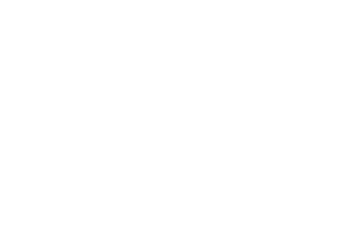

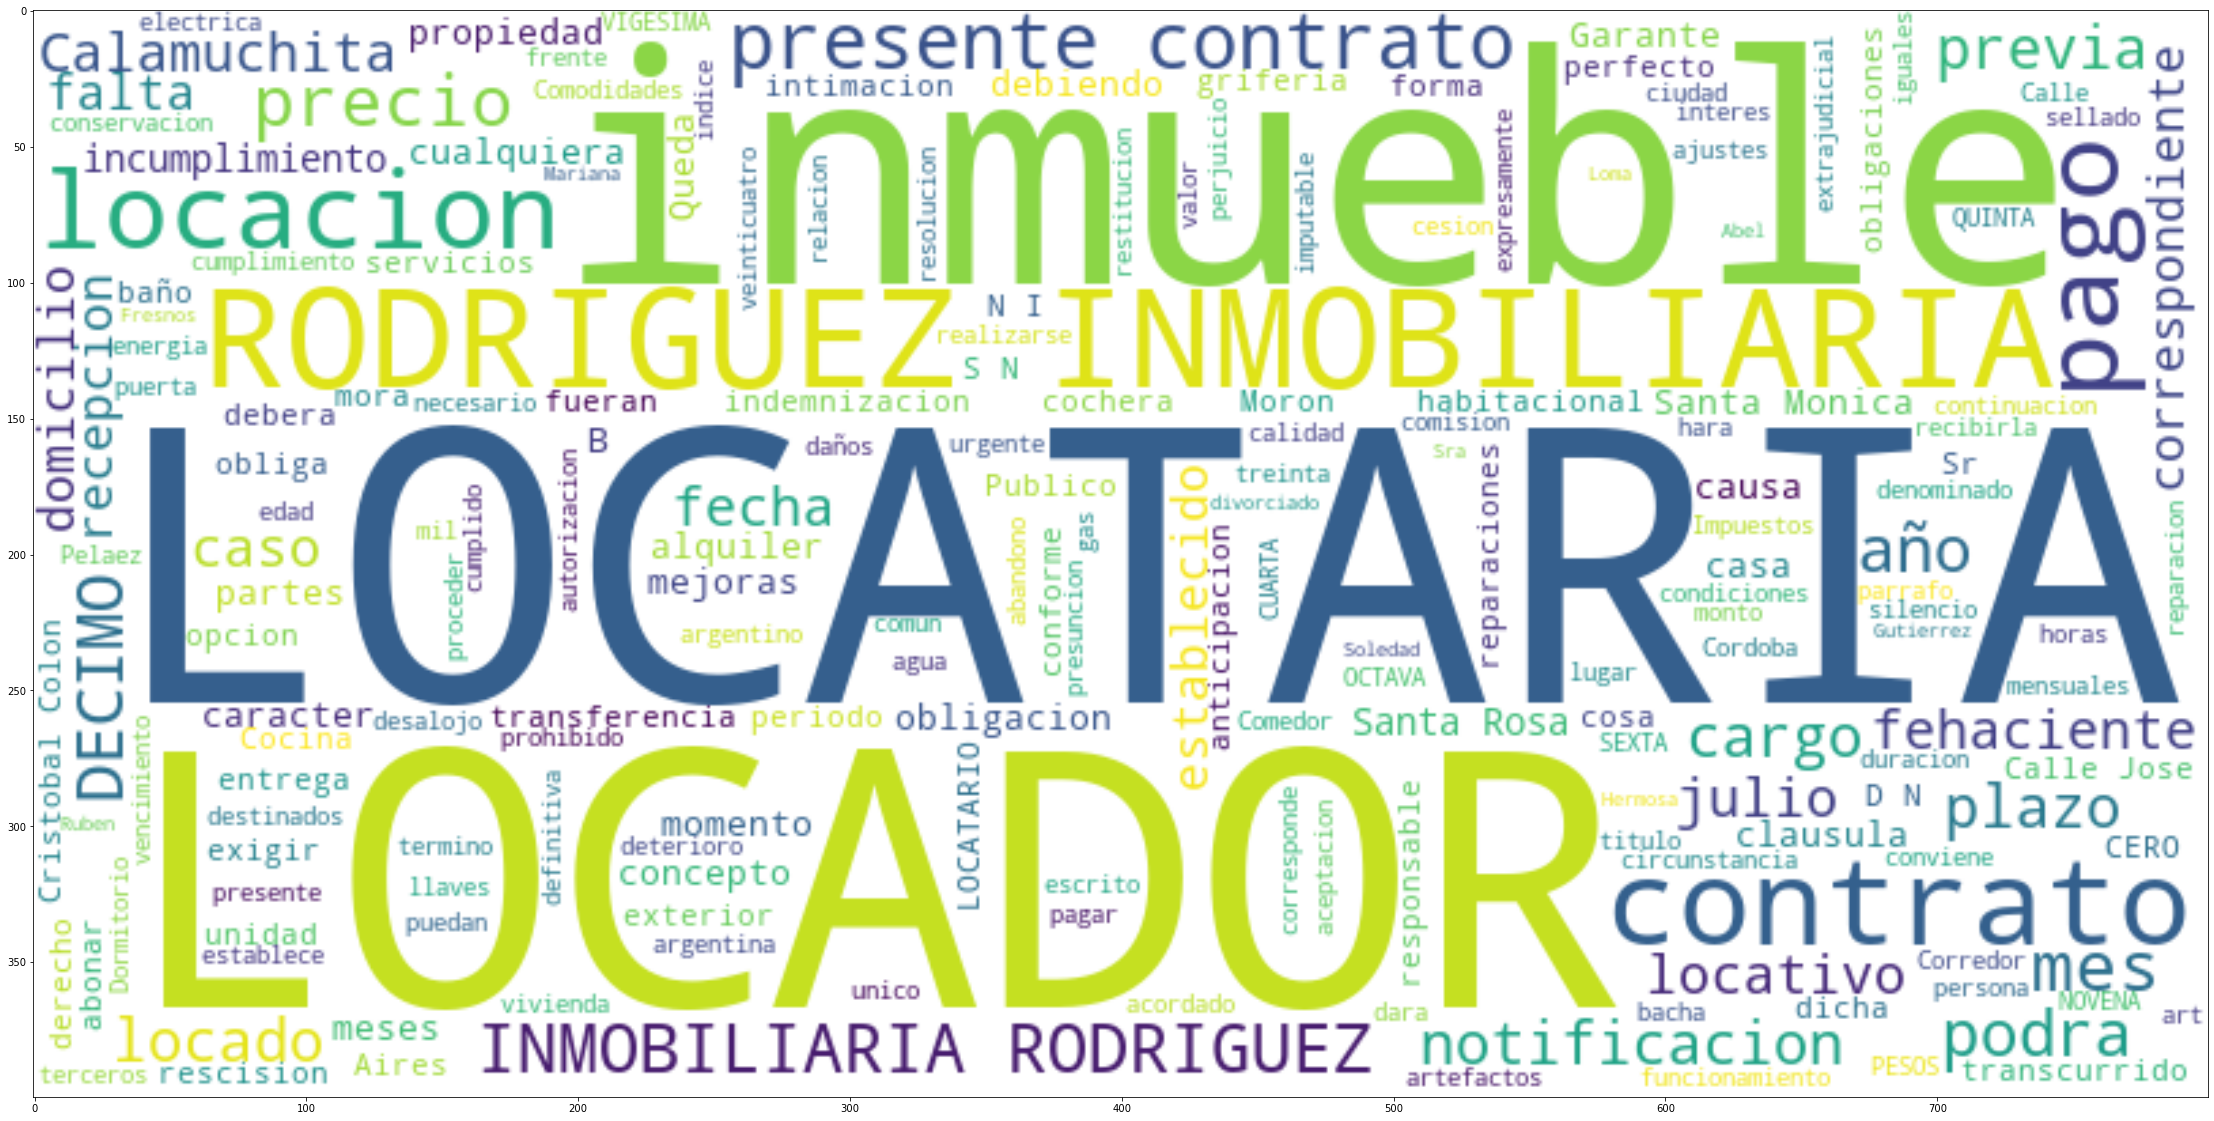

In [51]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(documento)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()